**P2_Q1**

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC 


from sklearn.metrics import average_precision_score, accuracy_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


train_dataset = pd.read_csv("/content/training_dataset.csv") 

test_blackscholes_dataset = pd.read_csv("/content/testing_blackscholes.csv") 

test_bodytrack_dataset = pd.read_csv("/content/testing_bodytrack.csv") 


y = train_dataset['w_big']
X_train = train_dataset.drop(['w_big','usage_c4','usage_c5', 'usage_c6', 'usage_c7'], axis=1) 

X_test_blacksholes = test_blackscholes_dataset.drop(['w_big','usage_c4','usage_c5', 'usage_c6', 'usage_c7'], axis=1) 
X_test_bodytrack = test_bodytrack_dataset.drop(['w_big','usage_c4','usage_c5', 'usage_c6', 'usage_c7'], axis=1) 


y.loc[y <= 1.0] = 0 
y.loc[y > 1.0] = 1

y_test_black = test_blackscholes_dataset['w_big']
y_test_black.loc[y_test_black <= 1.0] = 0 
y_test_black.loc[y_test_black > 1.0] = 1

y_test_body = test_bodytrack_dataset['w_big']
y_test_body.loc[y_test_body <= 1.0] = 0 
y_test_body.loc[y_test_body > 1.0] = 1

#normalize data
my_scaler = StandardScaler() 
X_train = my_scaler.fit_transform(X_train) 
X_test_blacksholes = my_scaler.transform(X_test_blacksholes)
X_test_bodytrack = my_scaler.transform(X_test_bodytrack)


classifier = SVC(kernel='poly', gamma='scale', degree=100, random_state=42)
classifier.fit(X_train,y)
y_pred = classifier.predict(X_test_blacksholes)
print("BLACK acc: ",accuracy_score(y_test_black, y_pred))
print("BLACK f1: ",f1_score(y_test_black, y_pred))
print("BLACK recall_score: ",recall_score(y_test_black, y_pred))
print("BLACK average_precision_score: ",average_precision_score(y_test_black, y_pred))


y_pred = classifier.predict(X_test_bodytrack)
print("BODY acc: ",accuracy_score(y_test_body, y_pred))
print("BODY f1: ",f1_score(y_test_body, y_pred))
print("BODY recall_score: ",recall_score(y_test_body, y_pred))
print("BODY average_precision_score: ",average_precision_score(y_test_body, y_pred))

#accuracy,precision, recall and F1-score

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


BLACK acc:  0.8342407743496673
BLACK f1:  0.8888888888888888
BLACK recall_score:  0.9981785063752276
BLACK average_precision_score:  0.8009201866966686
BODY acc:  0.6918844566712518
BODY f1:  0.8021201413427562
BODY recall_score:  1.0
BODY average_precision_score:  0.6696165191740413


**P2_Q2**

BLACK r2:  0.9566269821840311
BLACK mse:  0.05941814533608449


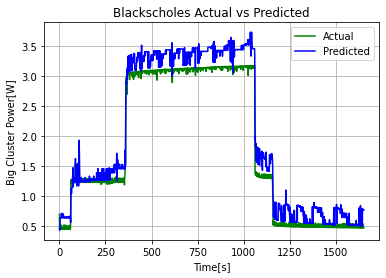

BODY r2:  0.9224313620151633
BODY mse:  0.1215646606406289


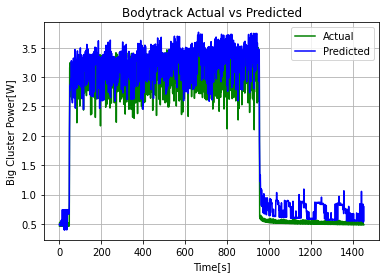

Training r2:  0.9869761626648632
Training mse:  0.010151781665943464


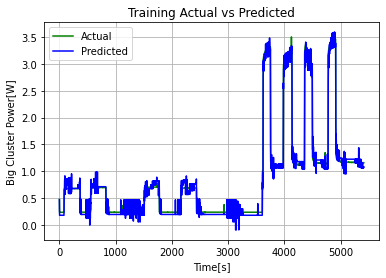

In [12]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt

train_dataset = pd.read_csv("/content/training_dataset.csv") 

test_blackscholes_dataset = pd.read_csv("/content/testing_blackscholes.csv") 

test_bodytrack_dataset = pd.read_csv("/content/testing_bodytrack.csv") 


y = train_dataset['w_big']
X_train = train_dataset.drop(['w_big','total_watts', 'w_little', 'w_gpu','w_mem'], axis=1) 

X_test_blacksholes = test_blackscholes_dataset.drop(['w_big','total_watts', 'w_little', 'w_gpu','w_mem'], axis=1) 
X_test_bodytrack = test_bodytrack_dataset.drop(['w_big','total_watts', 'w_little', 'w_gpu','w_mem'], axis=1) 

y_test_black = test_blackscholes_dataset['w_big']
y_test_body = test_bodytrack_dataset['w_big']

#normalize data
my_scaler = StandardScaler() 
X_train = my_scaler.fit_transform(X_train) 
X_test_blacksholes = my_scaler.transform(X_test_blacksholes)
X_test_bodytrack = my_scaler.transform(X_test_bodytrack)


regressor = LinearRegression()
regressor.fit(X_train, y)

y_pred = regressor.predict(X_test_blacksholes)
print("BLACK r2: ",r2_score(y_test_black, y_pred))
print("BLACK mse: ",mean_squared_error(y_test_black, y_pred))


plt.plot(y_test_black,'g', label='Actual')
plt.plot(y_pred,'b', label='Predicted')
plt.legend()
plt.xlabel('Time[s]')
plt.ylabel('Big Cluster Power[W]')
plt.grid(True)
plt.title('Blackscholes Actual vs Predicted')
plt.savefig('Blackscholes Actual vs Predicted.png')
plt.show()

y_pred = regressor.predict(X_test_bodytrack)
print("BODY r2: ",r2_score(y_test_body, y_pred))
print("BODY mse: ",mean_squared_error(y_test_body, y_pred))


plt.plot(y_test_body,'g', label='Actual')
plt.plot(y_pred,'b', label='Predicted')
plt.legend()
plt.xlabel('Time[s]')
plt.ylabel('Big Cluster Power[W]')
plt.grid(True)
plt.title('Bodytrack Actual vs Predicted')
plt.savefig('Bodytrack Actual vs Predicted.png')
plt.show()


y_pred = regressor.predict(X_train)
print("Training r2: ",r2_score(y, y_pred))
print("Training mse: ",mean_squared_error(y, y_pred))

plt.plot(y,'g', label='Actual')
plt.plot(y_pred,'b', label='Predicted')
plt.legend()
plt.xlabel('Time[s]')
plt.ylabel('Big Cluster Power[W]')
plt.grid(True)
plt.title('Training Actual vs Predicted')
plt.savefig('Training Actual vs Predicted.png')
plt.show()


#accuracy,precision, recall and F1-score

**P2 Q3**

No handles with labels found to put in legend.


Feature: 0, Score: 0.02348
Feature: 1, Score: 0.01572
Feature: 2, Score: -0.00097
Feature: 3, Score: 0.02974
Feature: 4, Score: 1.00116
Feature: 5, Score: 0.68157
Feature: 6, Score: 0.21325
Feature: 7, Score: 0.57254
Feature: 8, Score: -1.65602
Feature: 9, Score: -1.45737
Feature: 10, Score: 1.51417
[ 5  4 10]


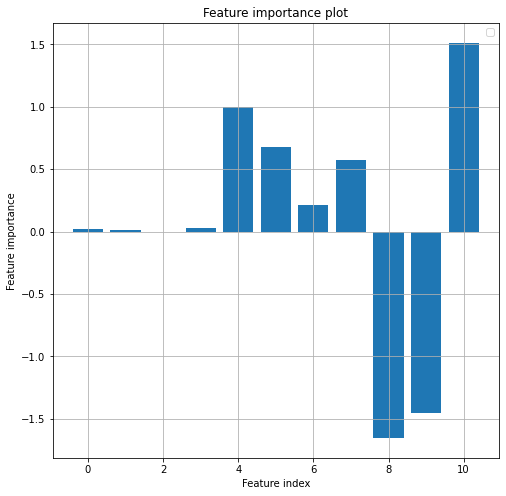

In [3]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt

train_dataset = pd.read_csv("/content/training_dataset.csv") 

y = train_dataset['w_big']
X_train = train_dataset.drop(['w_big','total_watts', 'w_little', 'w_gpu','w_mem'], axis=1) 


def vddf_calc(f):
  if f == 900000000 :
    return 900000000*(0.975**2)
  elif f == 1000000000 :
    return 1000000000
  elif f == 1500000000 :
    return 1500000000*(1.1375**2)
  elif f == 2000000000 :
    return 2000000000*(1.362**2)
  
#Adding dff
X_train['vf'] = X_train.apply(lambda x: vddf_calc(x.freq_big_cluster), axis='columns')

#normalize data
my_scaler = StandardScaler() 
X_train = my_scaler.fit_transform(X_train) 


regressor = LinearRegression()
regressor.fit(X_train, y)

importance = regressor.coef_
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

top_3 = importance.argsort()[-3:]
print(top_3)

plt.figure(figsize=(8,8))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature index')
plt.ylabel('Feature importance')
plt.legend()
plt.grid(True)
plt.title('Feature importance plot')
plt.show()
